In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
# Set the path to your dataset folder
dataset_folder = "E:\\mlprojectimages"

In [3]:
# Load images and labels
def load_images_and_labels(folder):
    images = []
    labels = []
    class_folders = os.listdir(folder)

    for class_folder in class_folders:
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (32, 32))  # Adjust size as needed
                images.append(img.flatten())
                labels.append(class_folder)

    return np.array(images), np.array(labels)

In [4]:
# Load and preprocess the dataset
X, y = load_images_and_labels(dataset_folder)


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


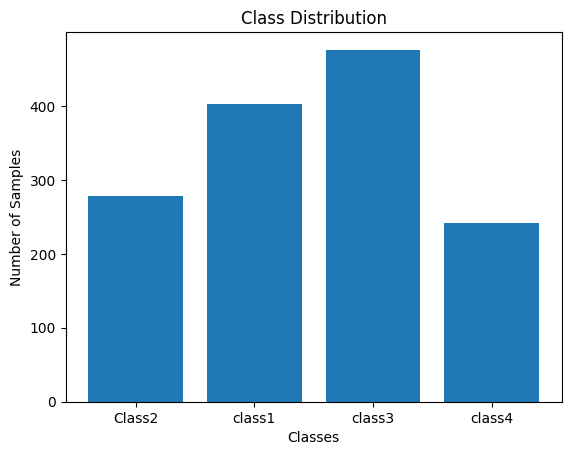

In [55]:
def display_class_distribution(labels, label_encoder):
    encoded_labels = label_encoder.transform(labels)
    class_counts = np.bincount(encoded_labels)
    unique_labels = label_encoder.classes_

    plt.bar(unique_labels, class_counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()
display_class_distribution(y_train,label_encoder)

In [7]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=100)  # You can adjust the number of components
svm = SVC()


In [8]:
# Create a pipeline with PCA and SVM
model = make_pipeline(pca, svm)


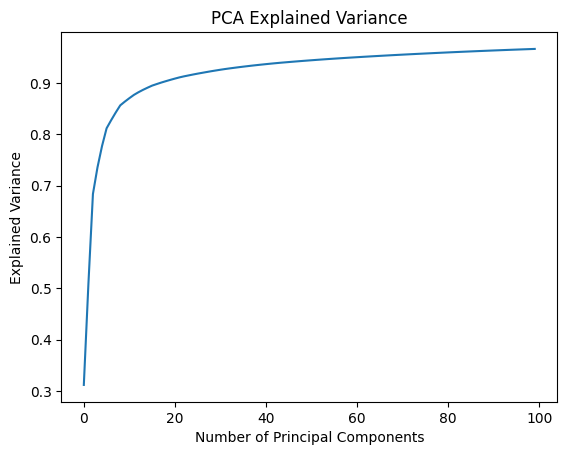

In [53]:
explained_variance = np.cumsum(pca.explained_variance_ratio_) 
plt.plot(explained_variance) 
plt.xlabel('Number of Principal Components') 
plt.ylabel('Explained Variance') 
plt.title('PCA Explained Variance') 
plt.show()

In [9]:
# Train the model
model.fit(X_train, y_train_encoded)

Pipeline(steps=[('pca', PCA(n_components=100)), ('svc', SVC())])

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [11]:
# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.8257142857142857


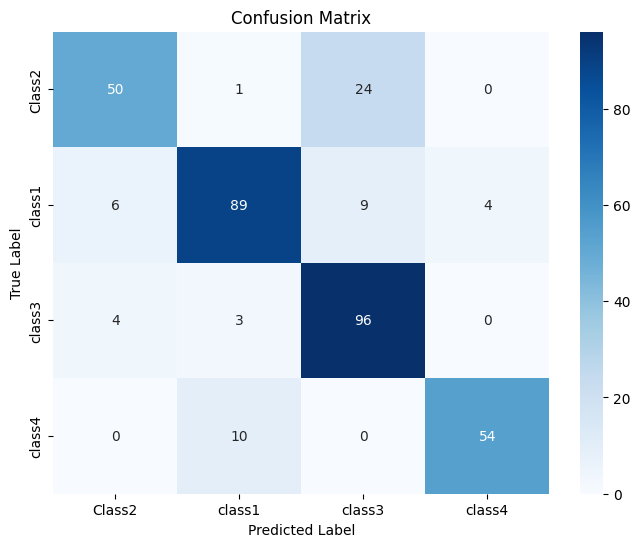

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test_encoded, predictions)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
import joblib

In [13]:
joblib.dump(model,'my_model.pkl')

['my_model.pkl']

In [14]:
model=joblib.load('my_model.pkl')

In [15]:
def preprocesses_image(img_path):
    img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(32,32))
    flattened_img=img.flatten()
    return flattened_img.reshape(1,-1)

In [30]:
input_image_path="E:\\mlprojectimages\\class1\\1701180787619.jpg"

In [31]:
input_image=preprocesses_image(input_image_path)
predicted_class=model.predict(input_image)

In [32]:
predicted_class_label=label_encoder.inverse_transform(predicted_class)
print(f'image belongs to: {predicted_class_label[0]}')

image belongs to: class1
